In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
path='/content/drive/MyDrive/Data set/Levine_32dim_notransform.csv'
data=pd.read_csv(path)

In [ ]:
data

Time  Cell_length         DNA1         DNA2     CD45RA  \
0         2693.0000           22   201.783295   253.016647   0.817049   
1         3736.0000           35   191.828598   308.869080   3.801385   
2         7015.0000           32   116.111923   200.839218   3.204439   
3         7099.0000           29   176.248505   313.022461   2.237382   
4         7700.0000           25   133.332779   226.467758  -0.044047   
...             ...          ...          ...          ...        ...   
265622  707951.4375           41  2305.191162  3131.641357  10.345075   
265623  708145.4375           45  2217.376953  3198.114258   0.585101   
265624  708398.4375           41  2455.673340  3157.416260   3.698715   
265625  708585.4375           39  2395.883789  3167.325439   1.463955   
265626  709122.4375           41  2450.653320  3113.955078   1.843143   

           CD133      CD19      CD22       CD11b        CD4  ...     CD117  \
0      -0.147947 -0.033482  0.332183   -0.045922   1.858334  ...  0.265375   
1      -0.191446 -0.083274  0.372388    4.494379  -0.177158  ...  0.448901   
2      -0.161106  0.369613 -0.214952   -0.009404  -0.043904  ...  0.231194   
3      -0.138071 -0.088311 -0.220430    4.006598  -0.095335  ...  0.332596   
4      -0.151509  0.402548  2.581769    6.742060   2.906627  ... -0.031117   
...          ...       ...       ...         ...        ...  ...       ...   
265622 -0.095875 -0.278241 -0.036303    0.317188   0.729079  ... -0.055526   
265623 -0.281215 -0.044320 -0.175828   -0.209287   5.648056  ...  0.721827   
265624 -0.031322 -0.130569 -0.154208   -0.173241  11.841664  ...  0.436060   
265625 -0.056550 -0.244025  0.370252   -0.158964   0.394406  ... -0.239947   
265626  0.644794 -0.034668  0.550337  119.171364   4.389215  ...  0.401405   

            CD49d       HLA-DR      CD64      CD41  Viability  file_number  \
0        4.804858    12.734092 -0.026878 -0.009804   3.474168           94   
1        0.995556     2.558165  0.726602  4.905976   2.956692           94   
2       33.025459     8.574364 -0.054804 -0.052067   3.443209           94   
3        8.879428     0.704930 -0.067247 -0.130211  -0.132632           94   
4        0.909562     0.993077  0.381205 -0.202496   1.435457           94   
...           ...          ...       ...       ...        ...          ...   
265622   2.797205     0.620372 -0.212540 -0.139874   1.195905           98   
265623   8.194910     0.236164 -0.039998 -0.129067  -0.017502           98   
265624  -0.279705     2.614141  0.269550 -0.213073   0.537059           98   
265625   0.510660  1231.869141  1.506284  0.969914   3.307683           98   
265626   0.189855    98.570404 -0.004392 -0.262749   1.577387           98   

        event_number  label  individual  
0              307.0    1.0           1  
1              545.0    1.0           1  
2             1726.0    1.0           1  
3             1766.0    1.0           1  
4             2031.0    1.0           1  
...              ...    ...         ...  
265622      102686.0    NaN           2  
265623      102690.0    NaN           2  
265624      102701.0    NaN           2  
265625      102706.0    NaN           2  
265626      102720.0    NaN           2  

[265627 rows x 41 columns]

In [ ]:
#create a DataFrame
df=pd.DataFrame(data)

In [ ]:
data=data.drop(columns=['Time','file_number','event_number'])

In [ ]:
df=df.drop(columns=['Time','file_number','event_number'])

In [ ]:
data.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'],
      dtype='object')

In [ ]:
df.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'],
      dtype='object')

# **EDA** **TECHNIQUES**

In [ ]:
#Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cell_length  265627 non-null  int64  
 1   DNA1         265627 non-null  float64
 2   DNA2         265627 non-null  float64
 3   CD45RA       265627 non-null  float64
 4   CD133        265627 non-null  float64
 5   CD19         265627 non-null  float64
 6   CD22         265627 non-null  float64
 7   CD11b        265627 non-null  float64
 8   CD4          265627 non-null  float64
 9   CD8          265627 non-null  float64
 10  CD34         265627 non-null  float64
 11  Flt3         265627 non-null  float64
 12  CD20         265627 non-null  float64
 13  CXCR4        265627 non-null  float64
 14  CD235ab      265627 non-null  float64
 15  CD45         265627 non-null  float64
 16  CD123        265627 non-null  float64
 17  CD321        265627 non-null  float64
 18  CD14         265627 non-

In [ ]:
# Calculate label and unlabel percentage
label_count = df['label'].count()
unlabel_count = df['label'].isna().sum()

label_percentage = (label_count / len(df)) * 100
unlabel_percentage = (unlabel_count / len(df)) * 100

print(f"Label percentage: {label_percentage:.2f}%")
print(f"Unlabel percentage: {unlabel_percentage:.2f}%")

Label percentage: 39.22%
Unlabel percentage: 60.78%


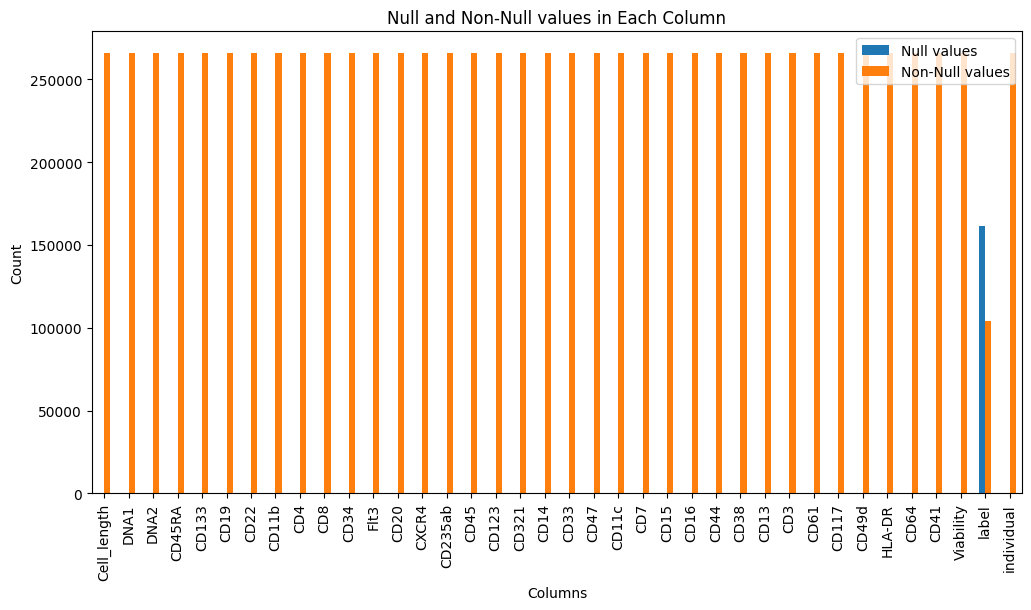

In [ ]:
#plot comparision of null values vs non-null values
null_counts=data.isnull().sum()
non_null_counts=data.notnull().sum()
plot_data=pd.DataFrame({"Null values": null_counts,
                        "Non-Null values": non_null_counts
                       })
plot_data.plot(kind="bar", figsize=(12, 6))
plt.title("Null and Non-Null values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

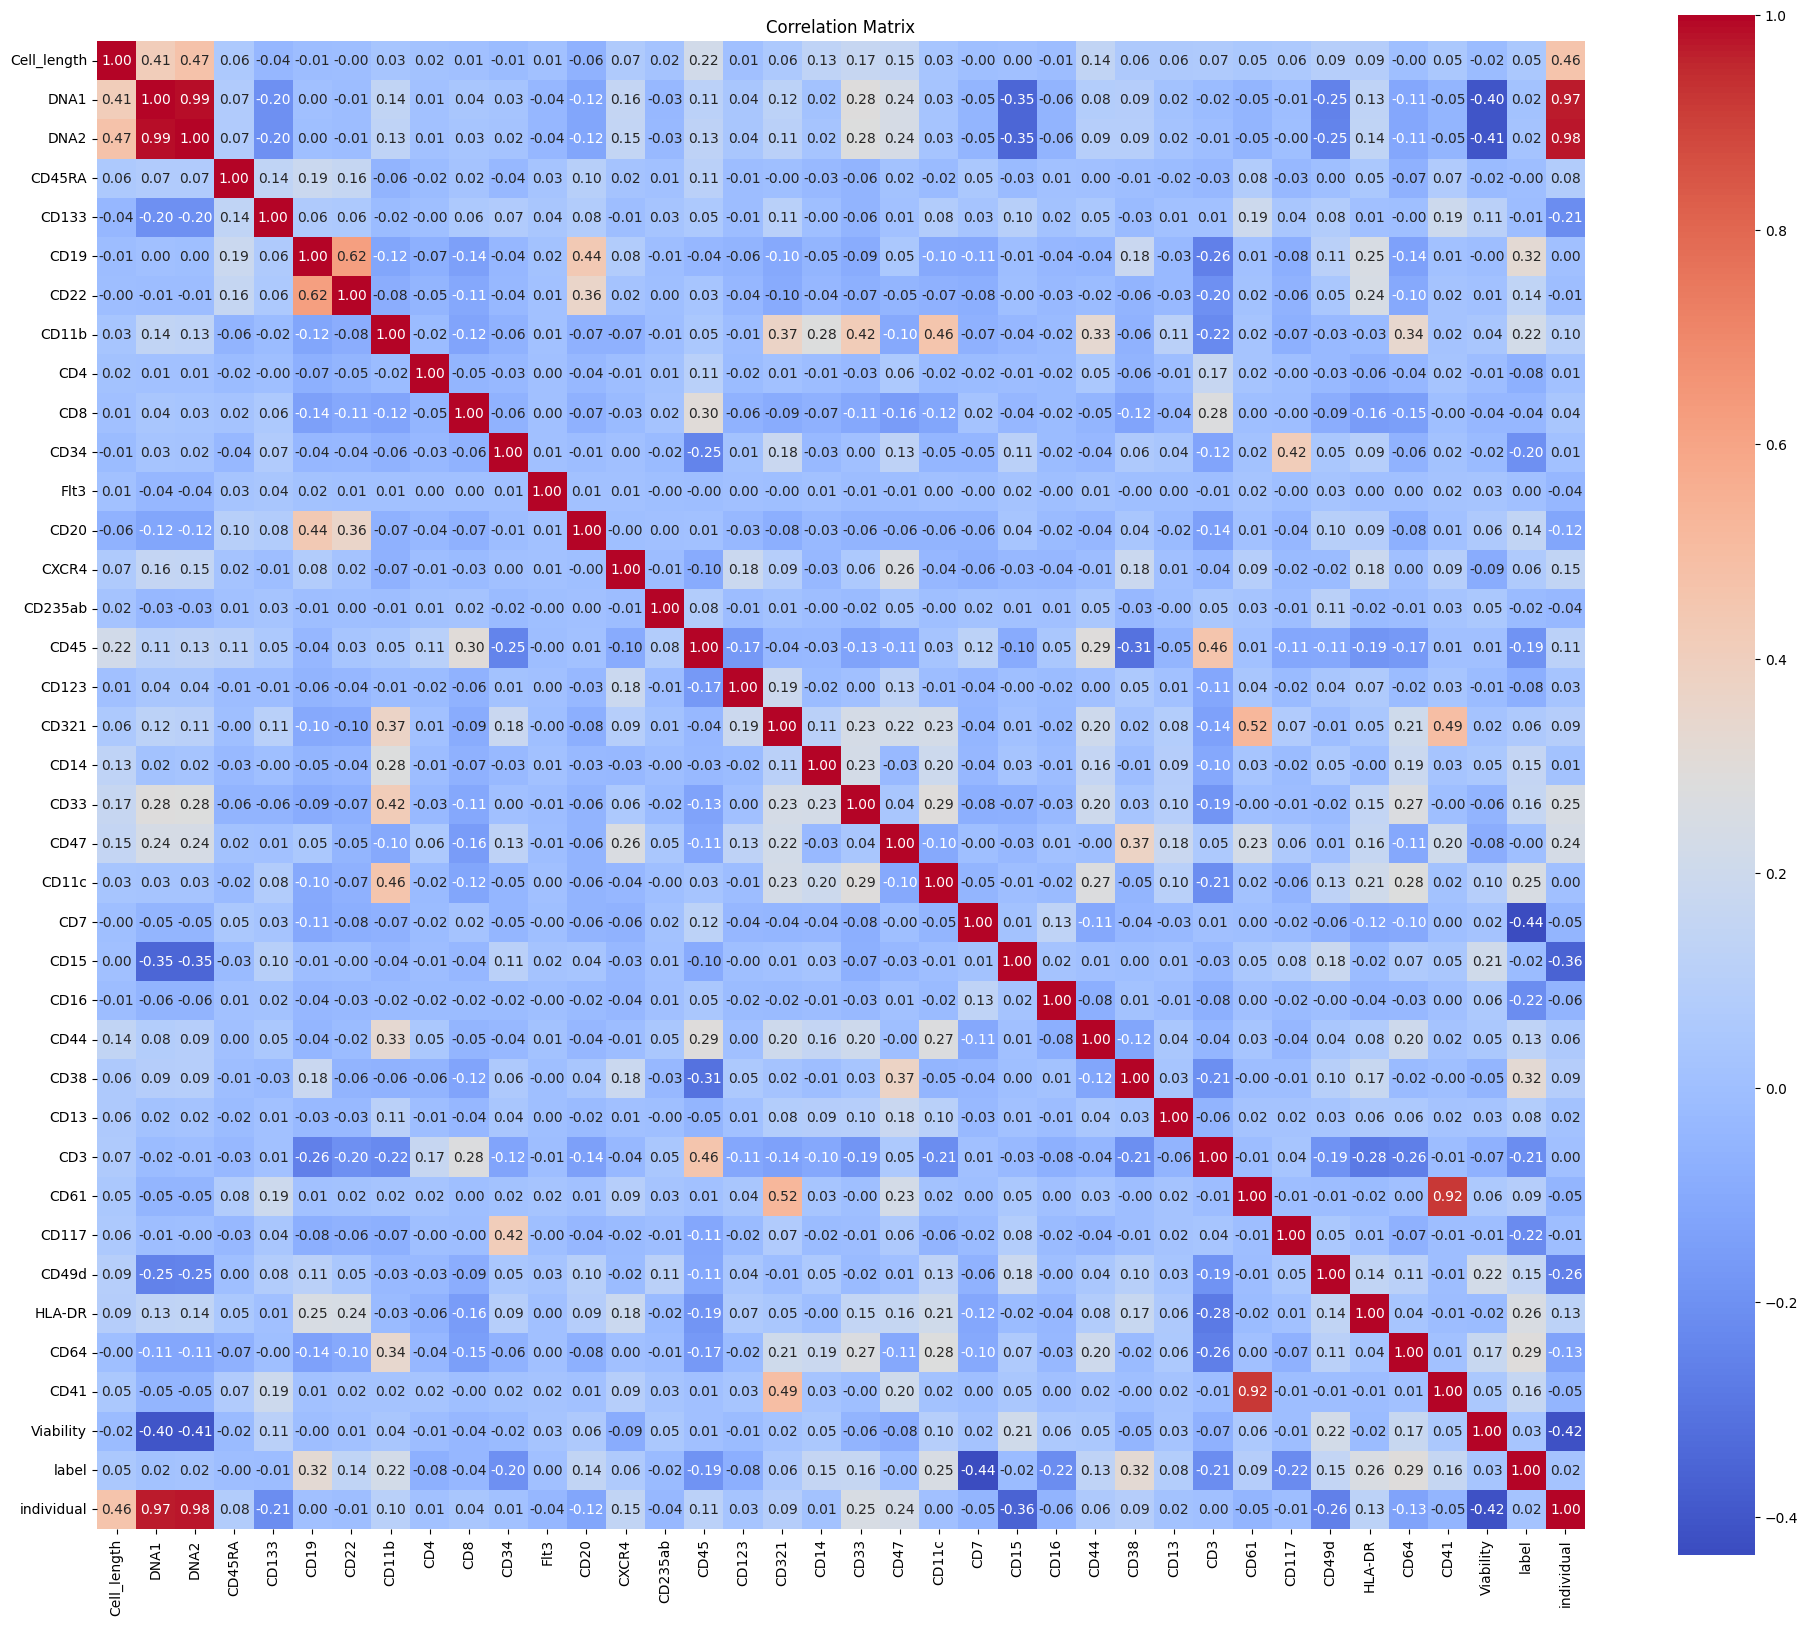

In [ ]:
#correlation matrix of data set
correlation_matrix=df.corr()
plt.figure(figsize=(24,20))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Range of Each Feature in data set
for column in df.columns:
    feature_range = df[column].max() - df[column].min()
    print(f"Range of {column}: {feature_range}")

Range of Cell_length: 55
Range of DNA1: 2705.260757446289
Range of DNA2: 4373.519323348999
Range of CD45RA: 2013.4970097541834
Range of CD133: 629.0630275011063
Range of CD19: 367.64589342474915
Range of CD22: 435.891390711069
Range of CD11b: 481.8620219230657
Range of CD4: 1804.810034424064
Range of CD8: 273.4073664546013
Range of CD34: 430.49149709939906
Range of Flt3: 3083.149202555413
Range of CD20: 1062.0647517740726
Range of CXCR4: 744.96462726593
Range of CD235ab: 1925.8784293532397
Range of CD45: 3459.6277294158986
Range of CD123: 1914.2225522100975
Range of CD321: 2401.3572410941124
Range of CD14: 373.5840930938722
Range of CD33: 684.8300481736662
Range of CD47: 1508.6325097084045
Range of CD11c: 1698.3260714411736
Range of CD7: 1388.134843885896
Range of CD15: 11.344912439584778
Range of CD16: 520.675962328911
Range of CD44: 4108.539601758122
Range of CD38: 3675.5327078402042
Range of CD13: 2690.7746390104294
Range of CD3: 2131.9424919188073
Range of CD61: 5795.503212273121
R

In [ ]:
#class label distribution of data set
label_distribution = df['label'].value_counts()

print("Class Label Distribution:")
print(label_distribution)

Class Label Distribution:
label
7.0     26366
10.0    21099
8.0     20108
9.0     16520
13.0     6135
2.0      3905
4.0      3295
3.0      2248
11.0     1238
1.0      1207
6.0       916
14.0      513
12.0      330
5.0       304
Name: count, dtype: int64


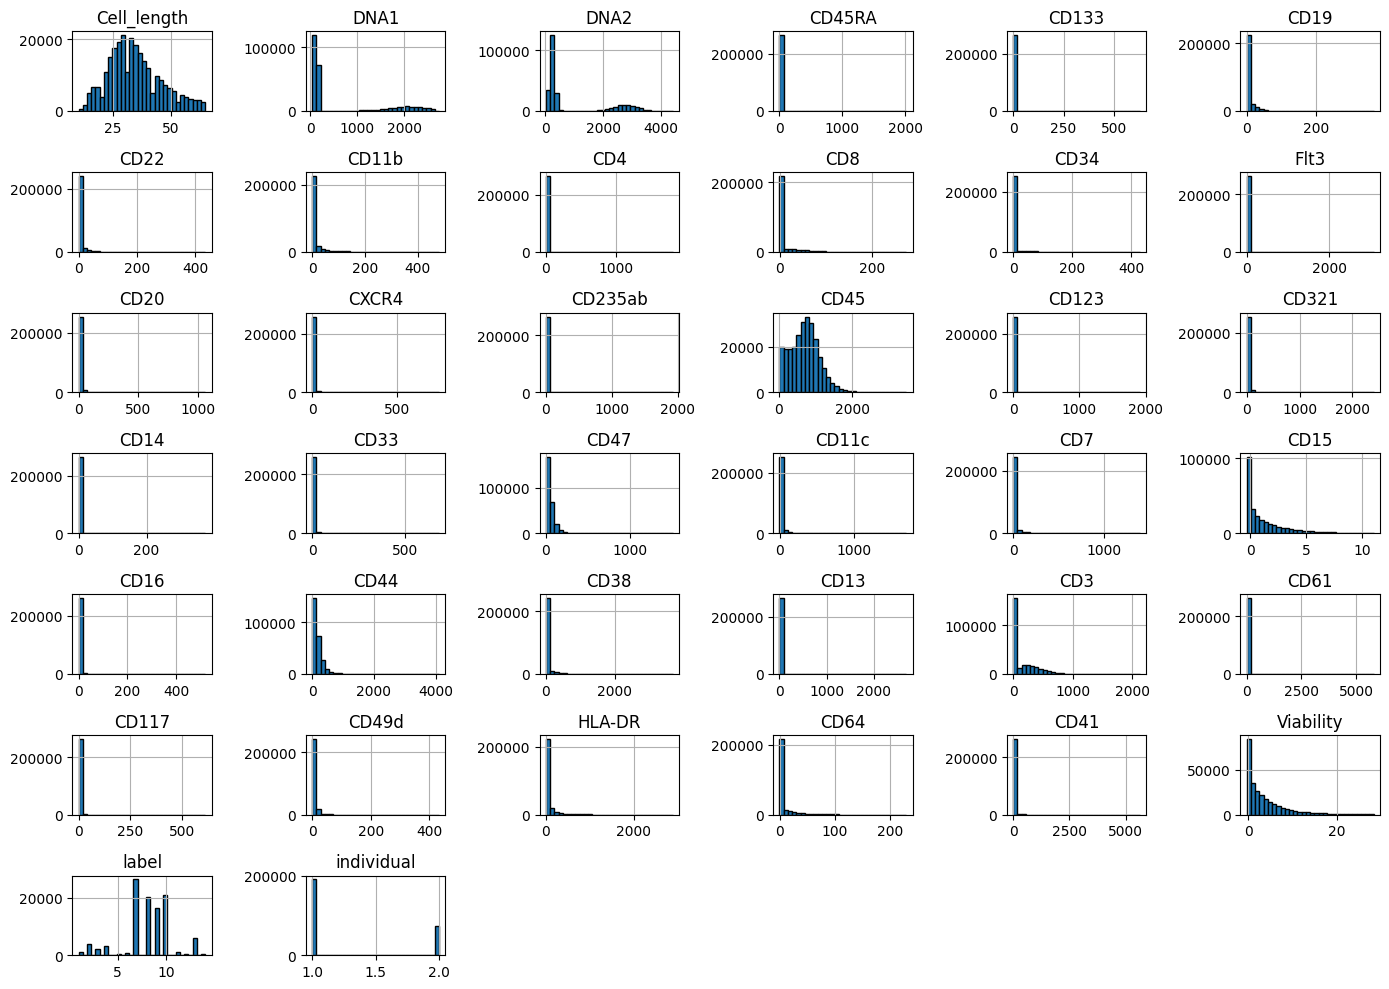

In [ ]:
#histrogram
df.hist(figsize=(14,10),bins=30,edgecolor='black')
plt.tight_layout()
plt.show()

(0.0, 6.0)

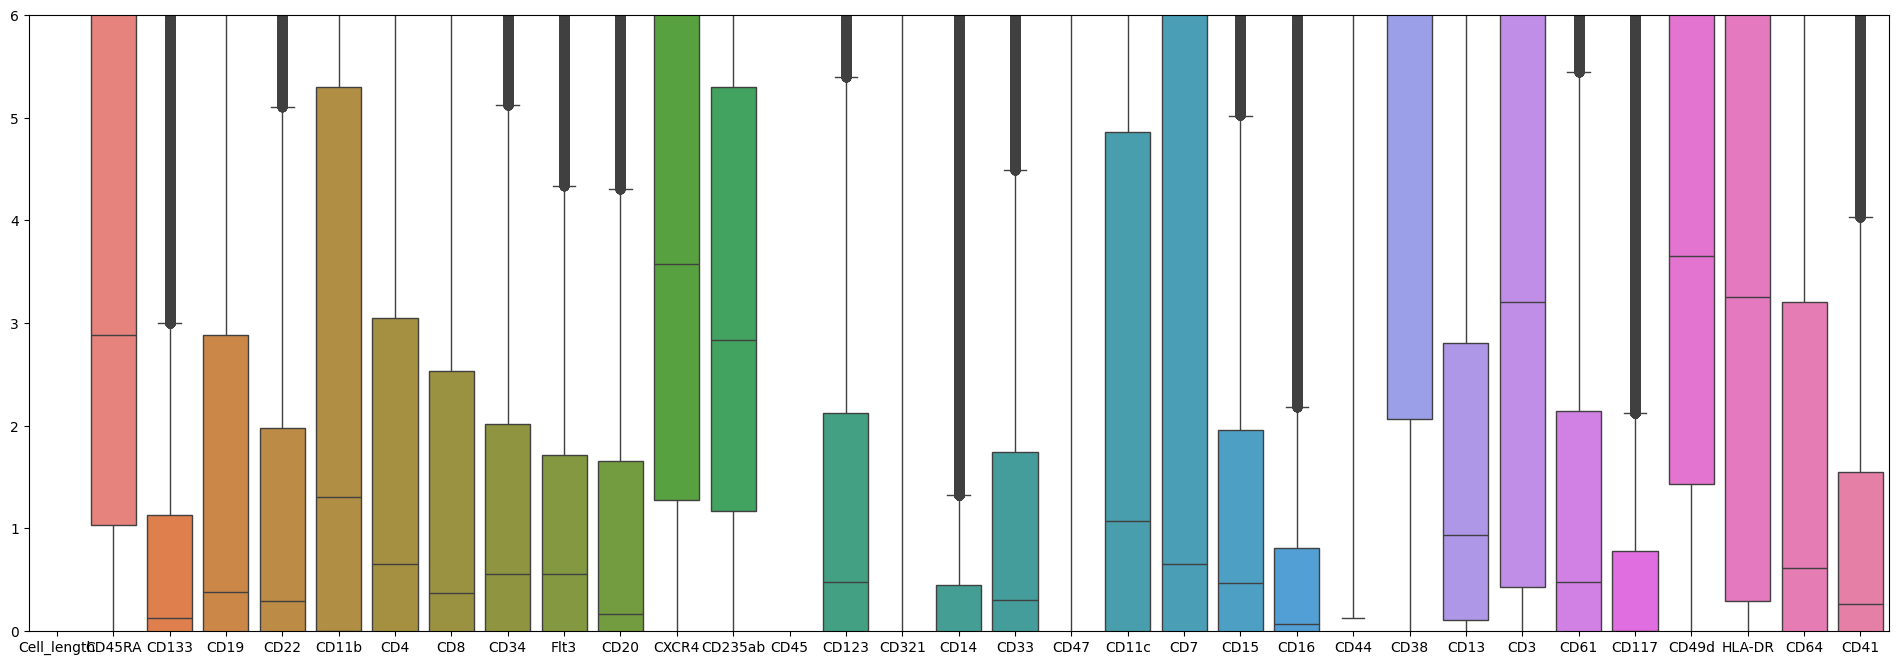

In [ ]:
#box plot
fig, ax = plt.subplots(figsize=(24, 8))
sns.boxplot(data=df[['Cell_length','CD45RA','CD133','CD19','CD22','CD11b','CD4','CD8','CD34','Flt3','CD20','CXCR4','CD235ab','CD45','CD123','CD321','CD14','CD33','CD47','CD11c','CD7','CD15','CD16','CD44','CD38','CD13','CD3','CD61','CD117','CD49d','HLA-DR','CD64','CD41']],ax=ax)
ax.set_ylim(0,6)

In [ ]:
#Calculate kurtosis of each featurebin the data set
from scipy.stats import kurtosis
# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Fisher=False gives Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

#  Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)# 4.1 Histogram for each column


                  Column      Kurtosis                   Category
Cell_length  Cell_length      2.834033  Platykurtic (light tails)
DNA1                DNA1      2.534998  Platykurtic (light tails)
DNA2                DNA2      2.427060  Platykurtic (light tails)
CD45RA            CD45RA   8914.445042  Leptokurtic (heavy tails)
CD133              CD133  39762.277510  Leptokurtic (heavy tails)
CD19                CD19     33.044641  Leptokurtic (heavy tails)
CD22                CD22     76.673855  Leptokurtic (heavy tails)
CD11b              CD11b     41.254044  Leptokurtic (heavy tails)
CD4                  CD4  17443.057242  Leptokurtic (heavy tails)
CD8                  CD8     16.299477  Leptokurtic (heavy tails)
CD34                CD34     95.275706  Leptokurtic (heavy tails)
Flt3                Flt3    862.869549  Leptokurtic (heavy tails)
CD20                CD20    206.215616  Leptokurtic (heavy tails)
CXCR4              CXCR4    577.158590  Leptokurtic (heavy tails)
CD235ab   

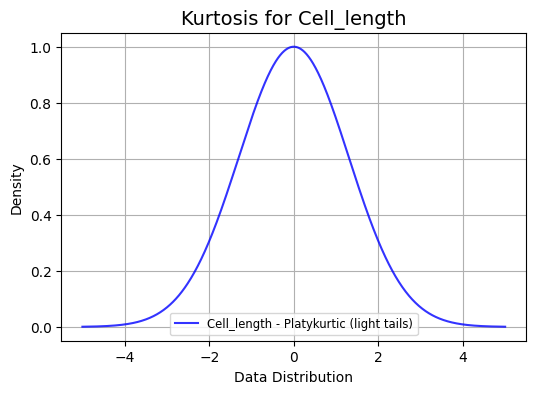

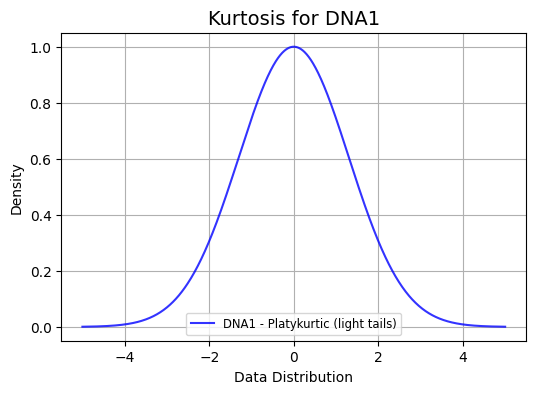

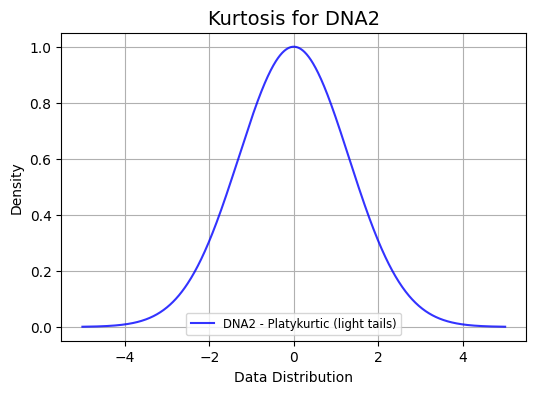

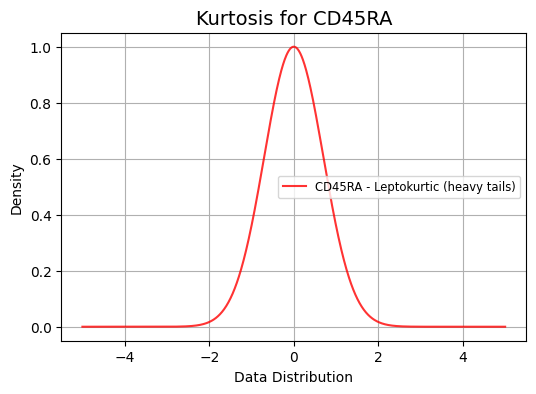

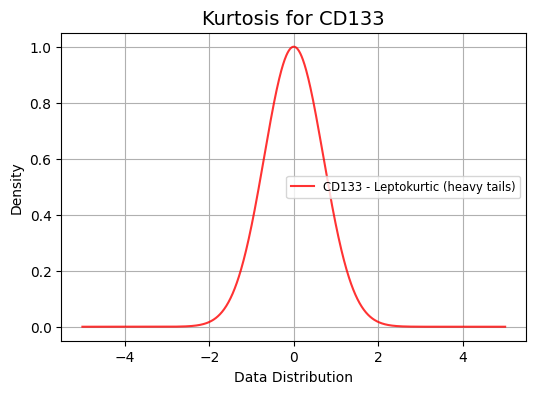

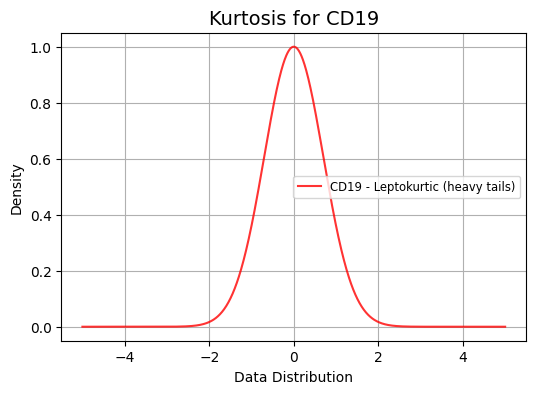

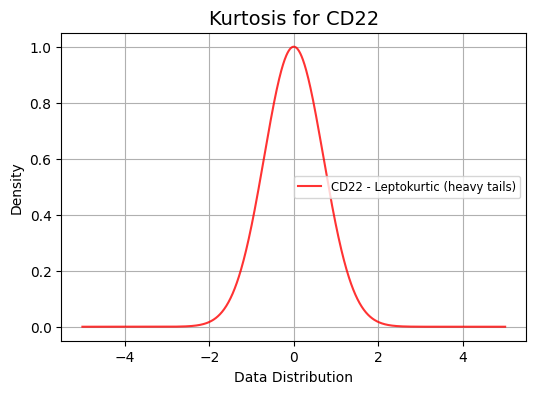

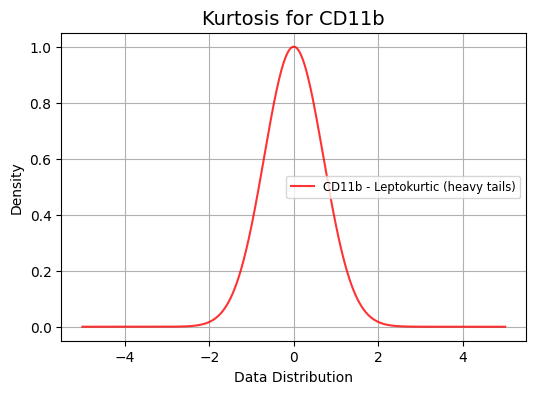

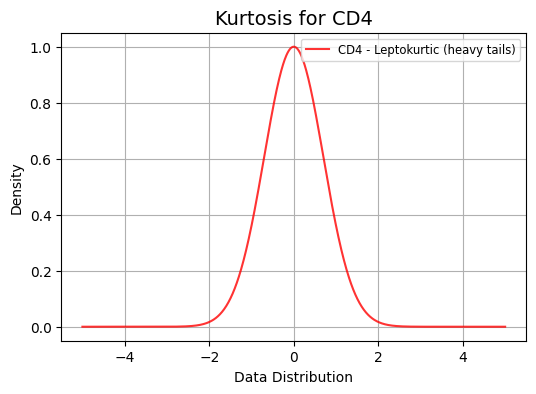

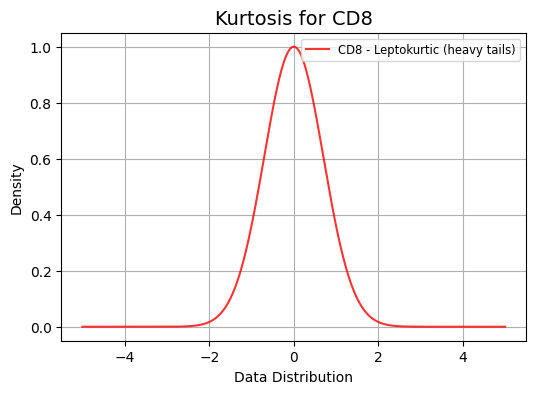

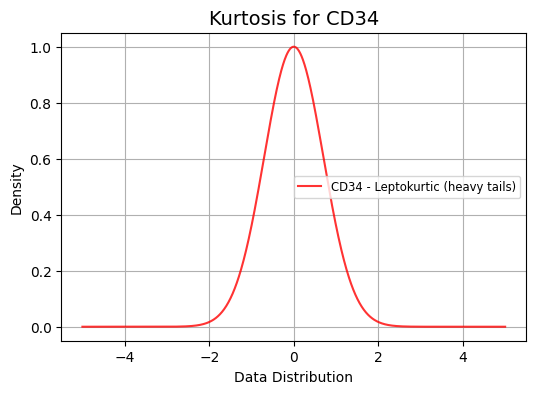

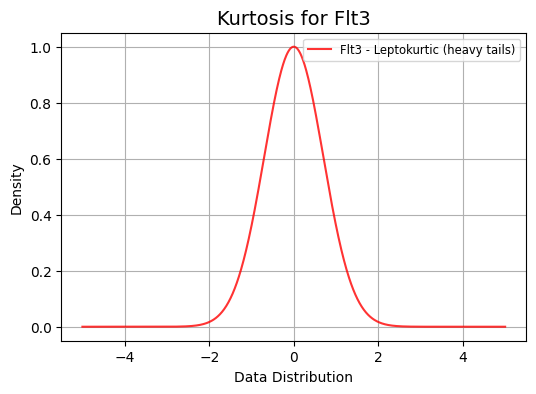

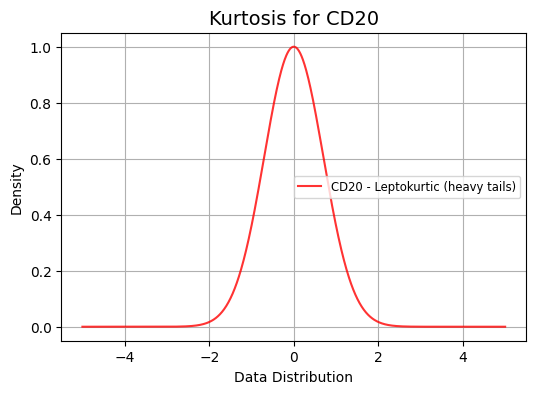

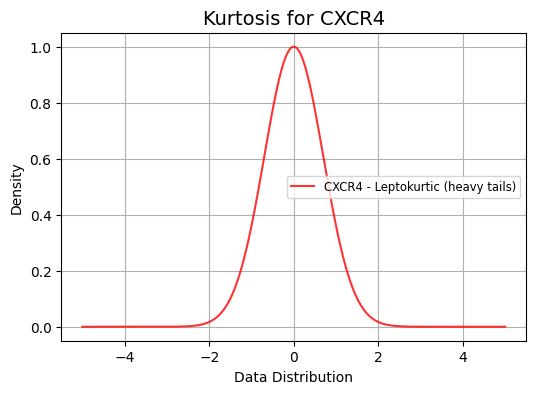

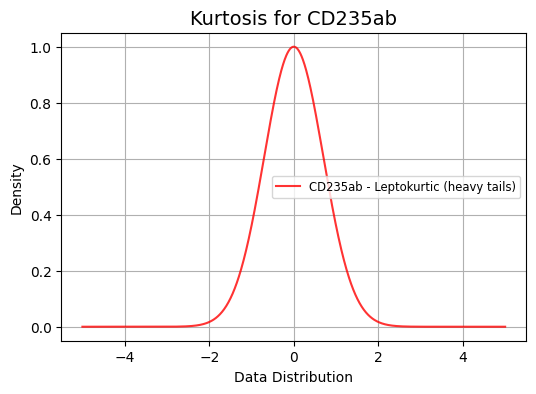

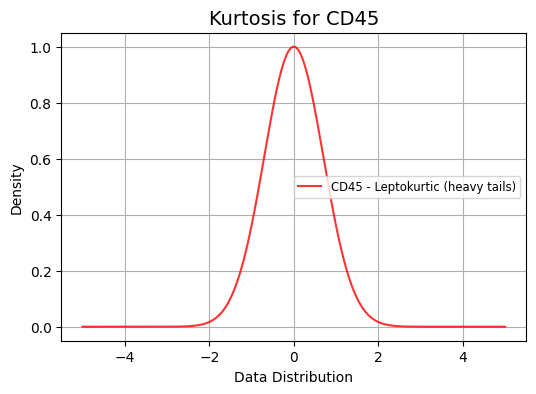

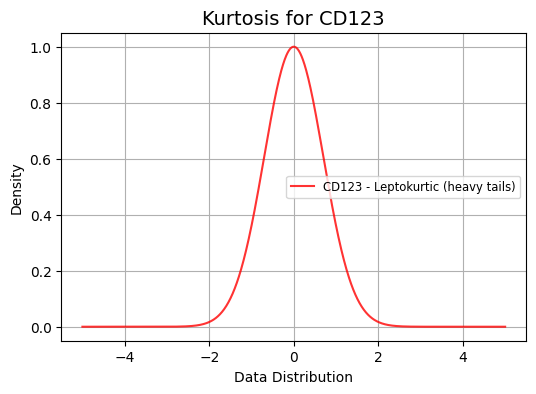

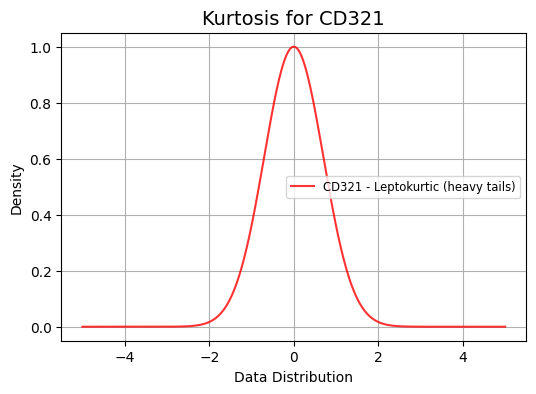

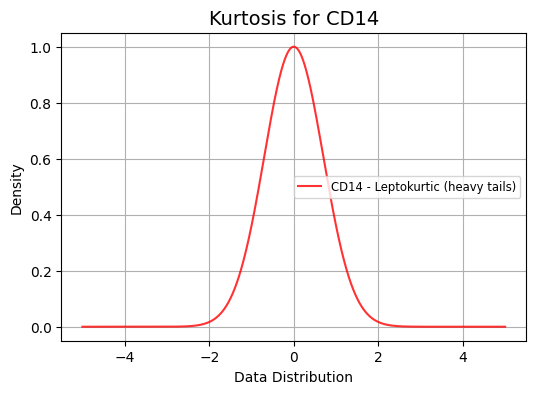

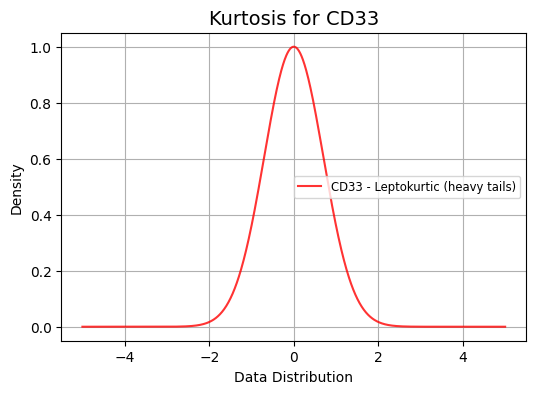

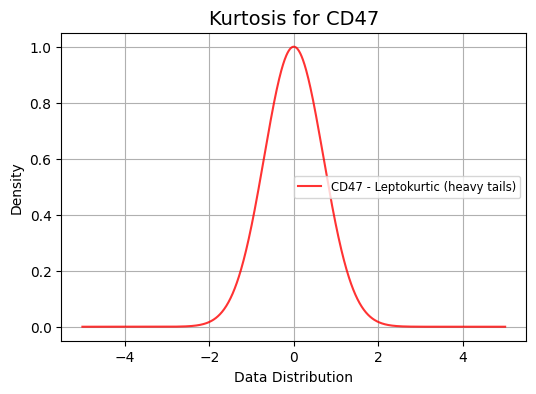

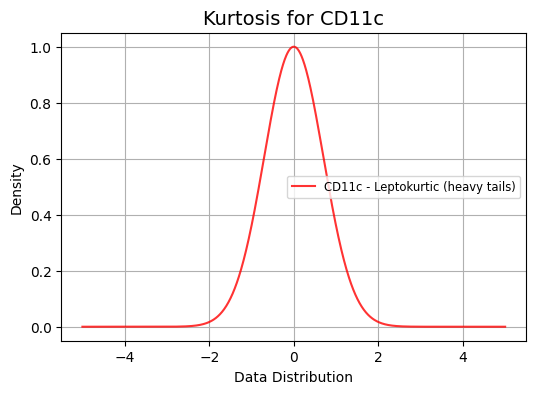

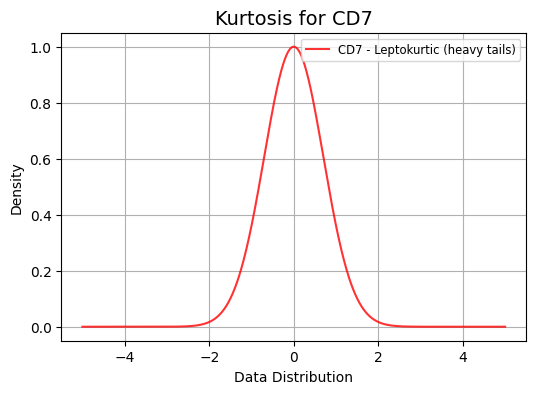

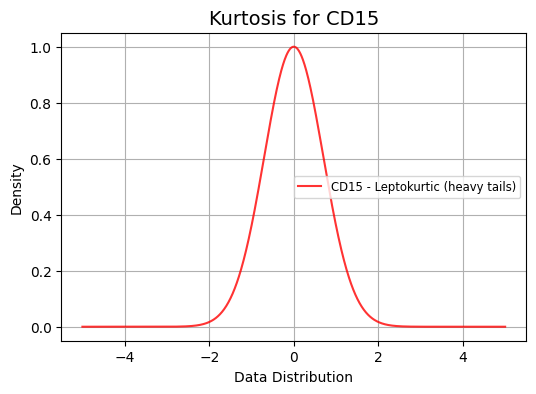

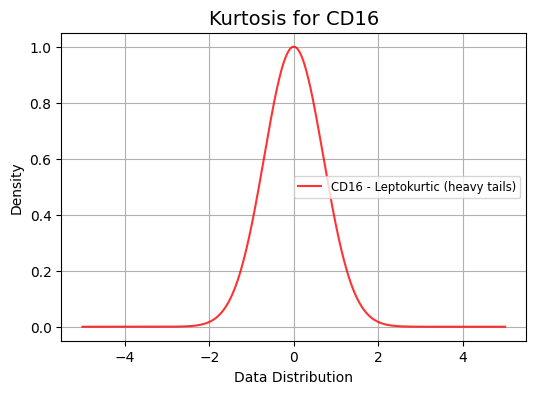

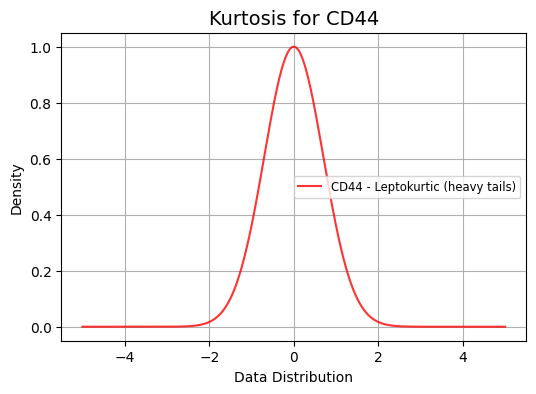

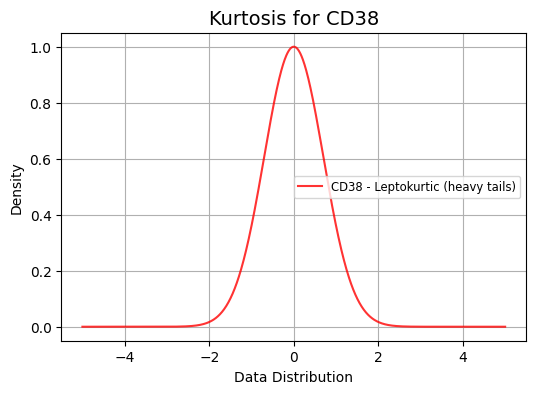

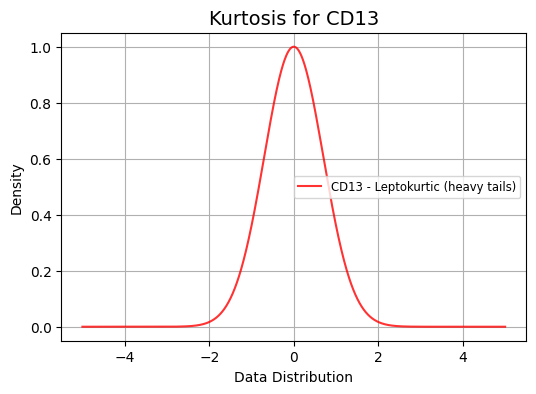

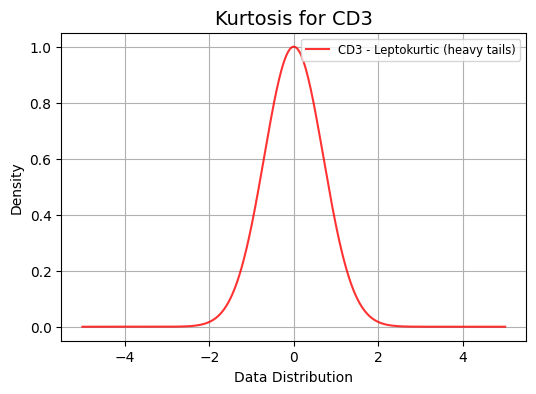

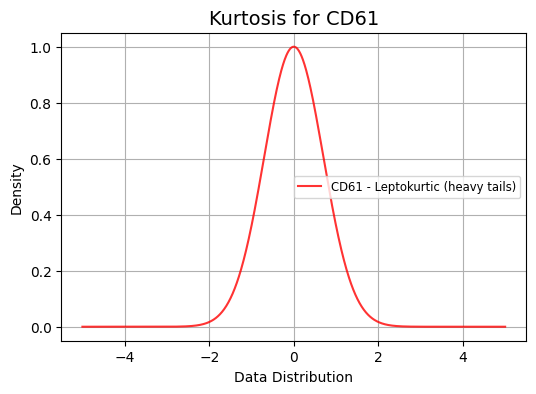

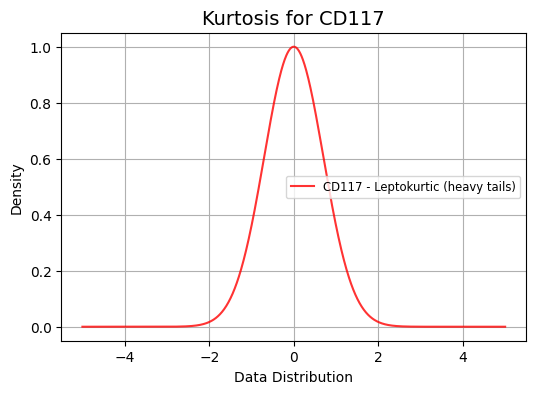

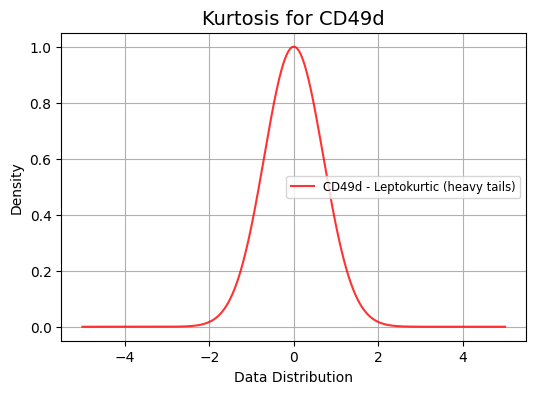

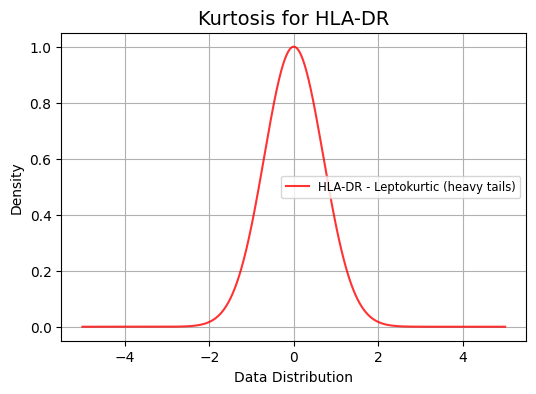

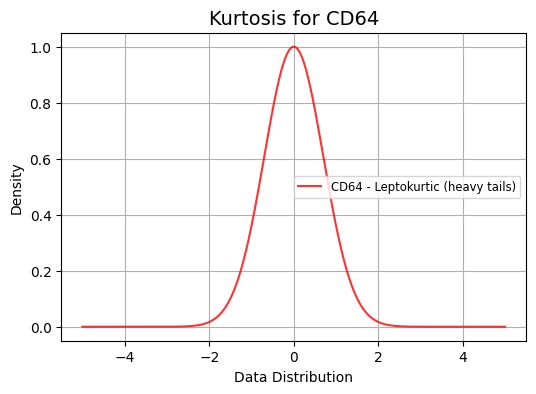

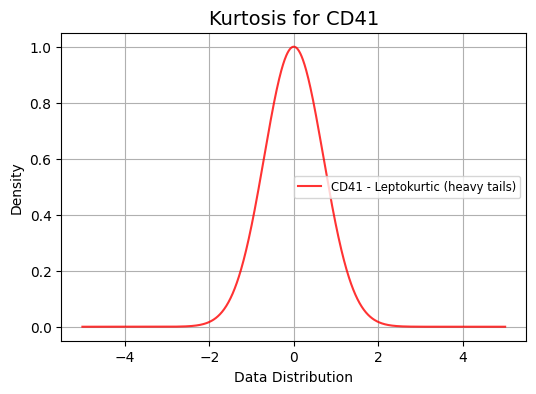

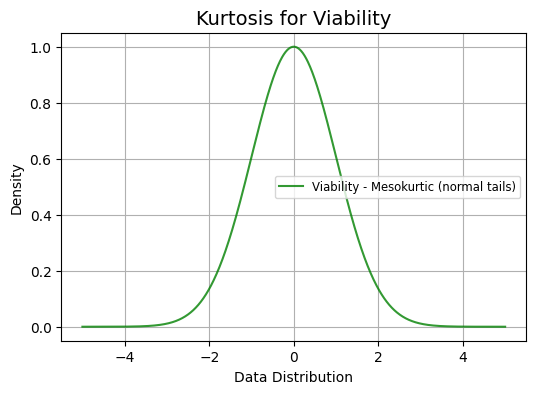

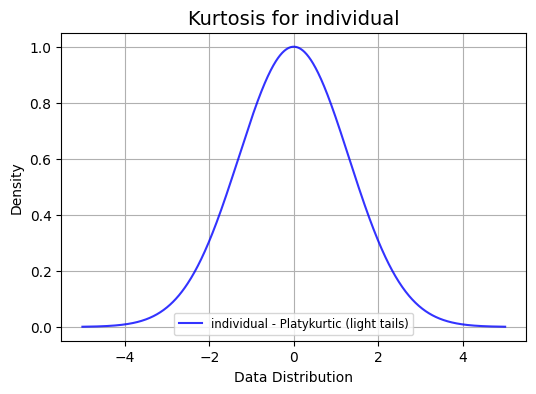

In [ ]:
# graph(kurtosis) of each individual feature in the data set
import numpy as np
import matplotlib.pyplot as plt

# Features and their respective kurtosis values
features = ['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8',
            'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47',
            'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
            'HLA-DR', 'CD64', 'CD41', 'Viability', 'individual']

kurtosis_values = [2.834033, 2.534998, 2.427060, 8914.445042, 39762.277510, 33.044641, 76.673855, 41.254044,
                   17443.057242, 16.299477, 95.275706, 862.869549, 206.215616, 577.158590, 1785.466381, 3.652132,
                   398.071278, 533.082177, 16355.281414, 468.243060, 54.322868, 127.718580, 76.440845, 6.609792,
                   271.364229, 31.102720, 109.335486, 12442.953303, 4.910874, 394.035613, 7830.374159, 173.700138,
                   33.940301, 21.793802, 680.890565, 7.500375, 1.964382]

# Categories based on kurtosis values
categories = ['Platykurtic (light tails)', 'Platykurtic (light tails)', 'Platykurtic (light tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)',
              'Leptokurtic (heavy tails)', 'Leptokurtic (heavy tails)', 'Mesokurtic (normal tails)',
              'Platykurtic (light tails)']

# Generate x-axis for curve plotting
x = np.linspace(-5, 5, 1000)

# Different colors for categories
colors = {'Leptokurtic (heavy tails)': 'red', 'Platykurtic (light tails)': 'blue', 'Mesokurtic (normal tails)': 'green'}

# Plot individual graphs for each feature
for i in range(len(features)):
    plt.figure(figsize=(6, 4))

    if categories[i] == 'Leptokurtic (heavy tails)':
        y = np.exp(-0.5 * (x / 0.7) ** 2)  # More peaked for leptokurtic
    elif categories[i] == 'Platykurtic (light tails)':
        y = np.exp(-0.5 * (x / 1.3) ** 2)  # Flatter for platykurtic
    else:
        y = np.exp(-0.5 * (x / 1.0) ** 2)  # Normal for mesokurtic

    # Plot each feature's kurtosis curve
    plt.plot(x, y, color=colors[categories[i]], label=f'{features[i]} - {categories[i]}', alpha=0.8)

    # Add title and labels
    plt.title(f'Kurtosis for {features[i]}', fontsize=14)
    plt.xlabel('Data Distribution')
    plt.ylabel('Density')

    # Display the legend
    plt.legend(loc="best", fontsize='small')

    # Show grid
    plt.grid(True)

    # Show each plot
    plt.show()


In [ ]:
# calculate skewness of each feature in the data set
from scipy.stats import skew

skewness = df.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)


               Skewness                   Category
Cell_length    0.527832               Right-skewed
DNA1           1.155424               Right-skewed
DNA2           1.108669               Right-skewed
CD45RA        65.251655               Right-skewed
CD133        126.096395               Right-skewed
CD19           4.007221               Right-skewed
CD22           6.131244               Right-skewed
CD11b          5.264678               Right-skewed
CD4          114.022325               Right-skewed
CD8            3.313920               Right-skewed
CD34           8.397363               Right-skewed
Flt3          26.230625               Right-skewed
CD20          10.655454               Right-skewed
CXCR4         14.332247               Right-skewed
CD235ab       35.288190               Right-skewed
CD45           0.514492               Right-skewed
CD123         13.956222               Right-skewed
CD321         15.415273               Right-skewed
CD14          74.327532        

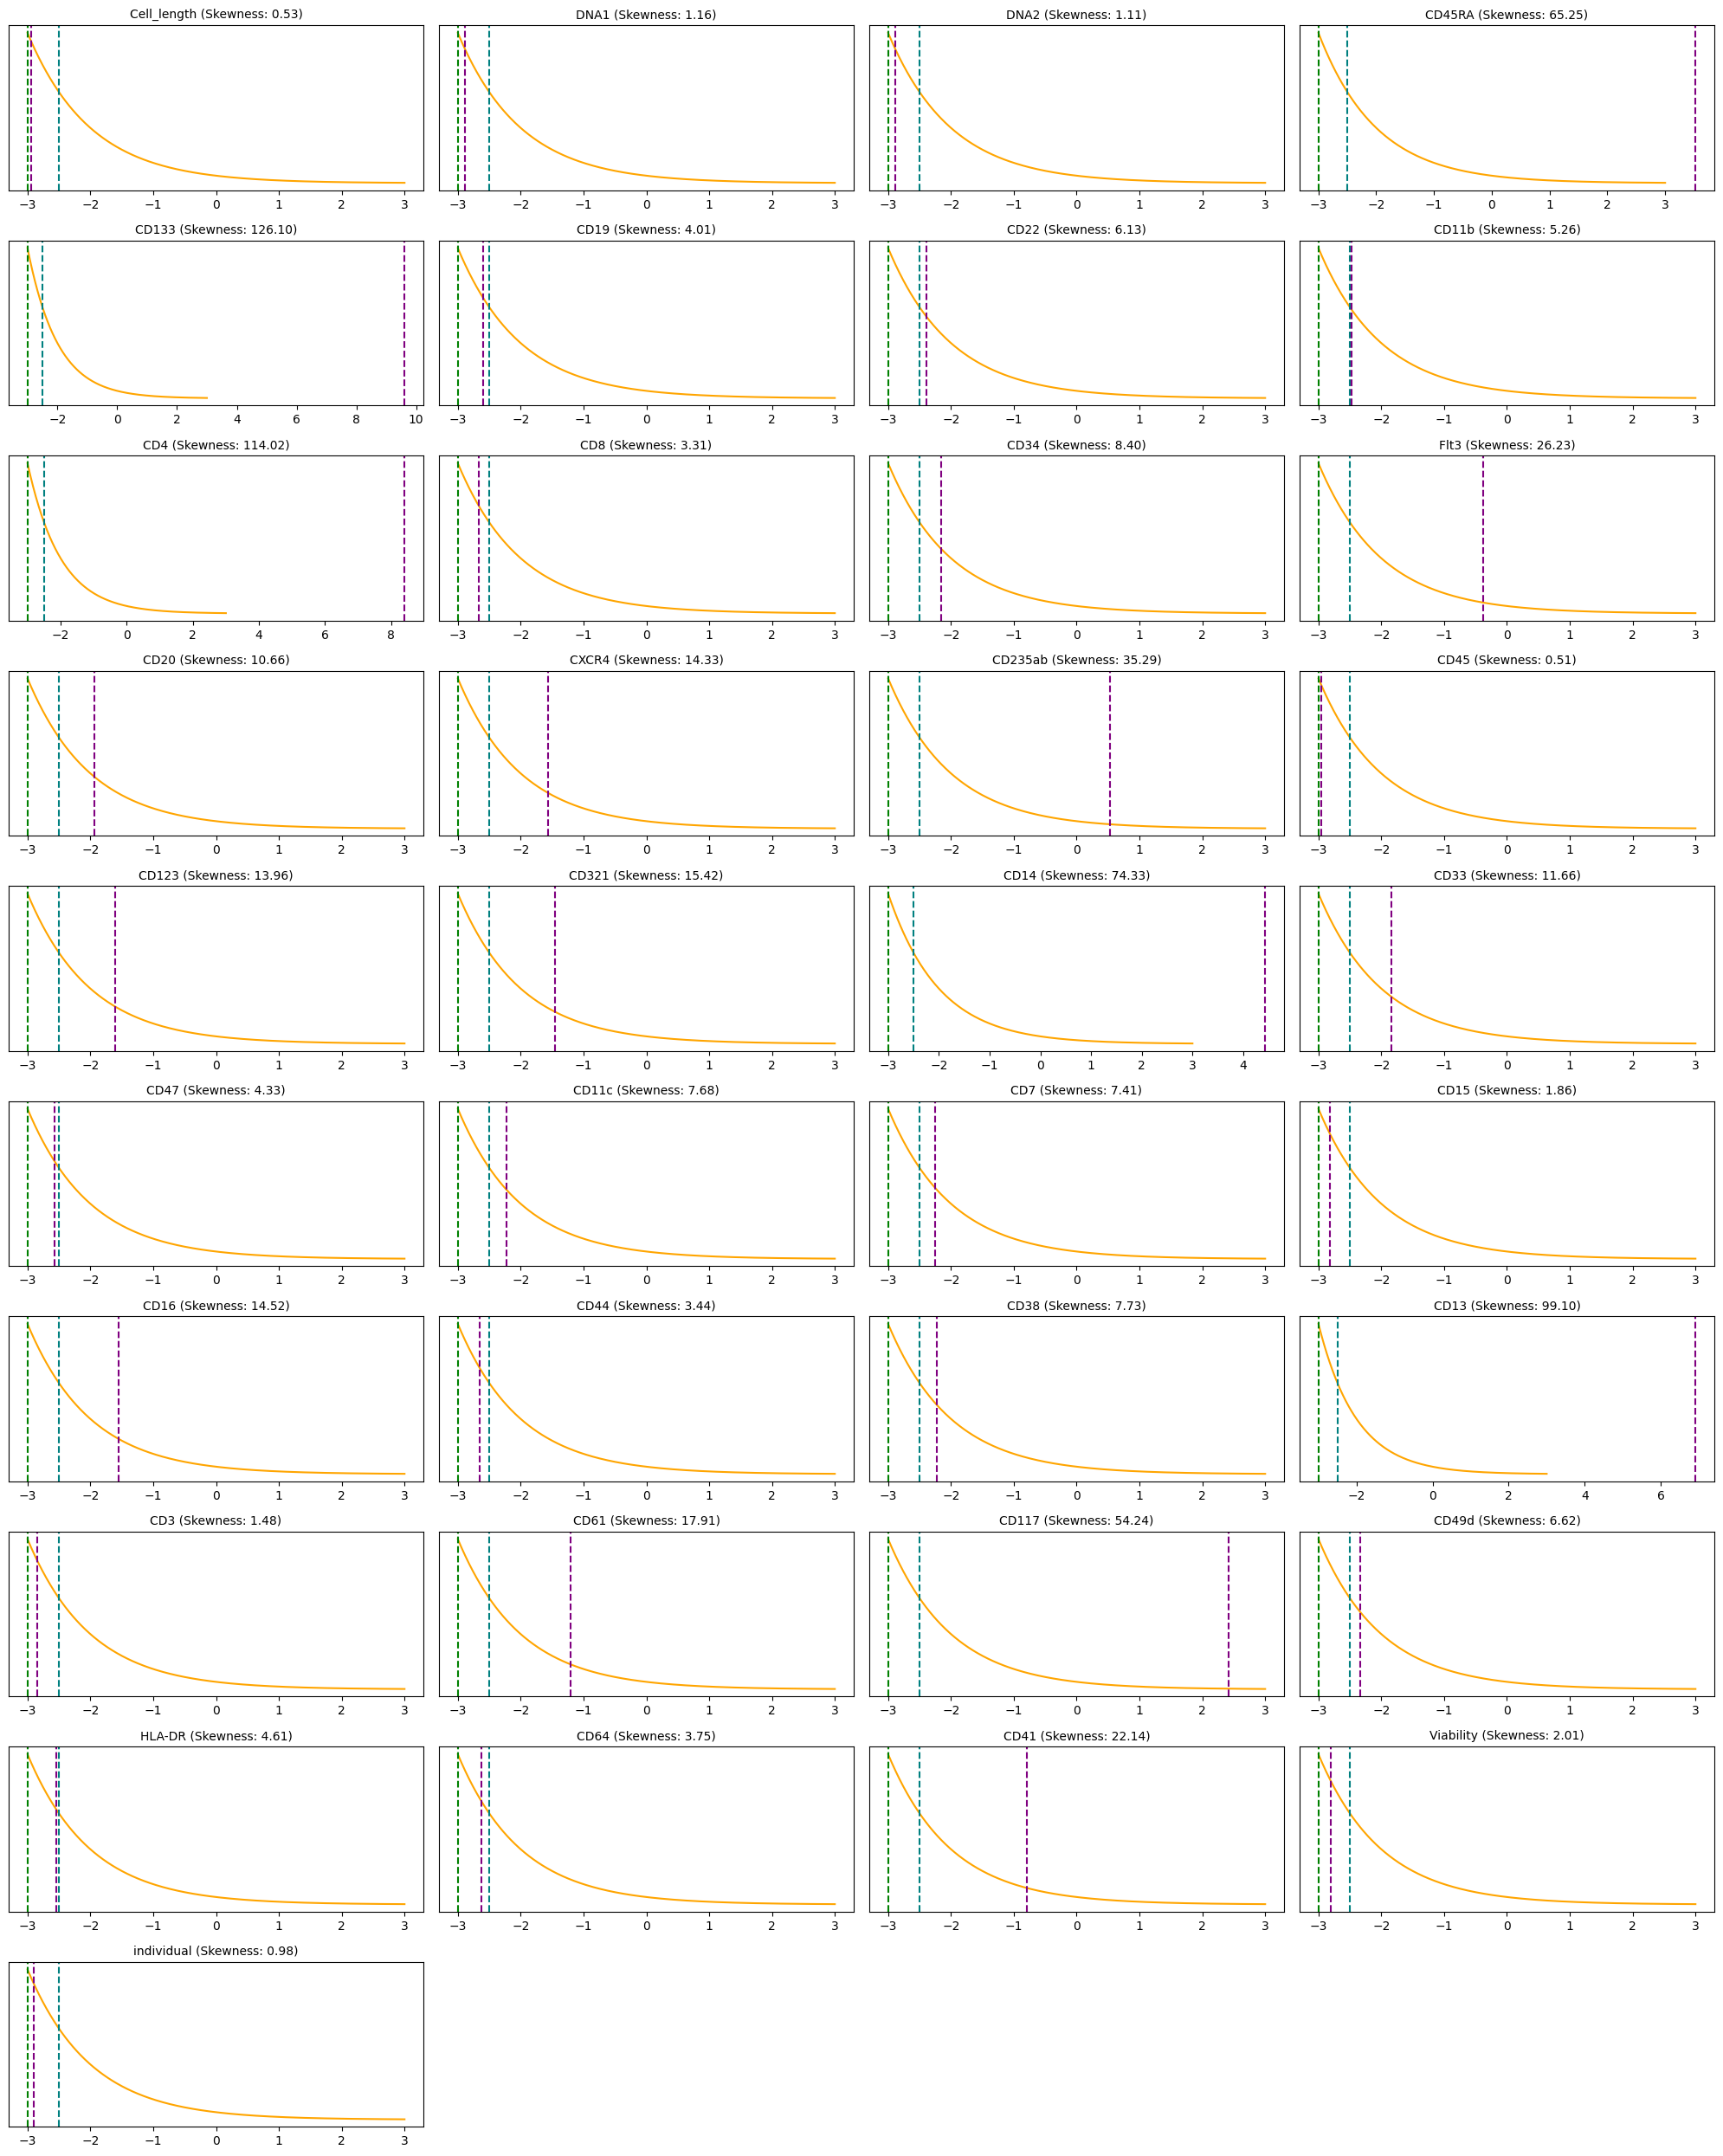

In [ ]:
# graph(skewness) of each individual feature in the data set
import numpy as np
import matplotlib.pyplot as plt

# Skewness data for each feature
skewness_data = {
    'Cell_length': 0.527832, 'DNA1': 1.155424, 'DNA2': 1.108669, 'CD45RA': 65.251655,
    'CD133': 126.096395, 'CD19': 4.007221, 'CD22': 6.131244, 'CD11b': 5.264678,
    'CD4': 114.022325, 'CD8': 3.313920, 'CD34': 8.397363, 'Flt3': 26.230625,
    'CD20': 10.655454, 'CXCR4': 14.332247, 'CD235ab': 35.288190, 'CD45': 0.514492,
    'CD123': 13.956222, 'CD321': 15.415273, 'CD14': 74.327532, 'CD33': 11.659128,
    'CD47': 4.327074, 'CD11c': 7.679567, 'CD7': 7.405451, 'CD15': 1.860022,
    'CD16': 14.520519, 'CD44': 3.436531, 'CD38': 7.733425, 'CD13': 99.104480,
    'CD3': 1.479010, 'CD61': 17.909078, 'CD117': 54.242959, 'CD49d': 6.622882,
    'HLA-DR': 4.612054, 'CD64': 3.752616, 'CD41': 22.140511, 'Viability': 2.013592,
    'individual': 0.982030
}

# Create subplots
fig, axes = plt.subplots(10, 4, figsize=(20, 25))
axes = axes.flatten()

# Plot each feature with skewness visualization
for i, (feature, skewness_val) in enumerate(skewness_data.items()):
    # Generate x values to represent the distribution curve
    x = np.linspace(-3, 3, 500)
    y = np.exp(-x) * (1 + skewness_val / 10)  # Skewed right

    # Normalize the y values to make the plot consistent
    y /= y.max()

    # Plot skewness curve
    axes[i].plot(x, y, color="orange")

    # Markers for Mode, Median, and Mean positions
    mode = x[np.argmax(y)]
    median = mode + 0.5
    mean = mode + skewness_val / 10  # approximate mean based on skewness

    # Add lines and labels for mode, median, and mean
    axes[i].axvline(mode, color='green', linestyle="--", label='Mode')
    axes[i].axvline(median, color='teal', linestyle="--", label='Median')
    axes[i].axvline(mean, color='purple', linestyle="--", label='Mean')

    # Set title and remove y-axis for simplicity
    axes[i].set_title(f"{feature} (Skewness: {skewness_val:.2f})", fontsize=10)
    axes[i].get_yaxis().set_visible(False)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


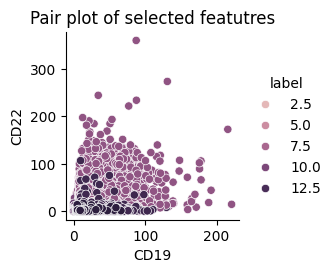

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(df,hue='label',x_vars=['CD19'],y_vars=['CD22'])
plt.title('Pair plot of selected featutres')
plt.show()

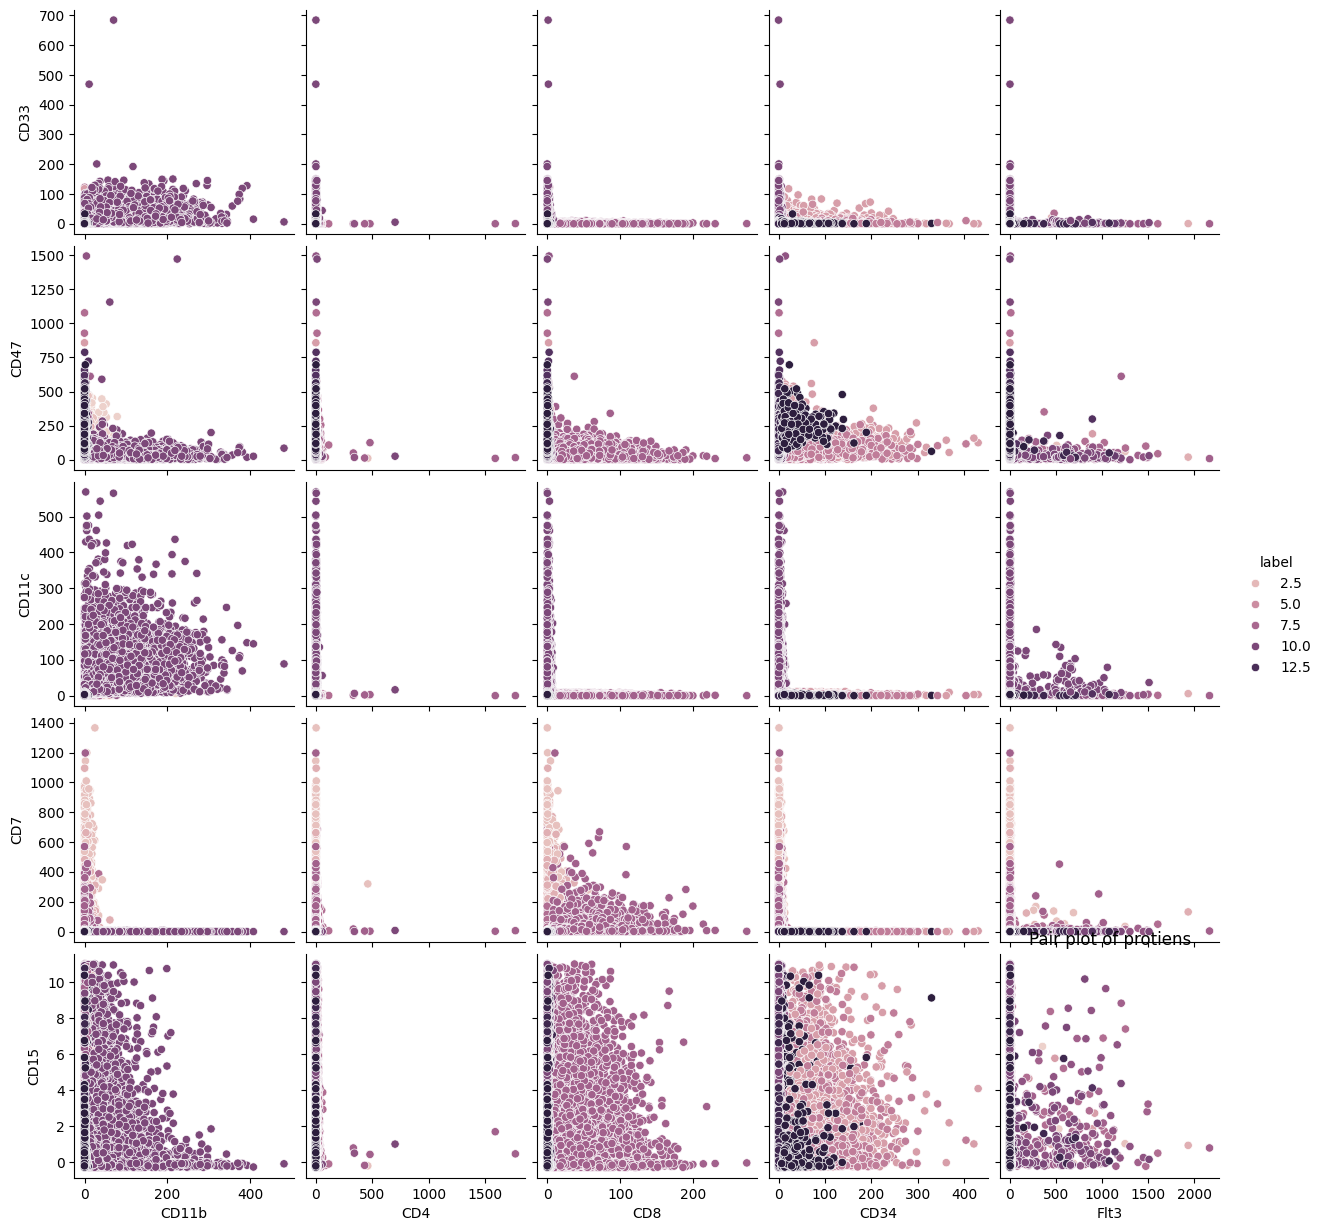

In [ ]:
sns.pairplot(df,hue='label',x_vars=['CD11b','CD4','CD8','CD34','Flt3'],y_vars=['CD33','CD47','CD11c','CD7','CD15'])
plt.title('Pair plot of protiens')
plt.show()

**DIMENSIONALITY REDUCTION TECHNIQUES**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


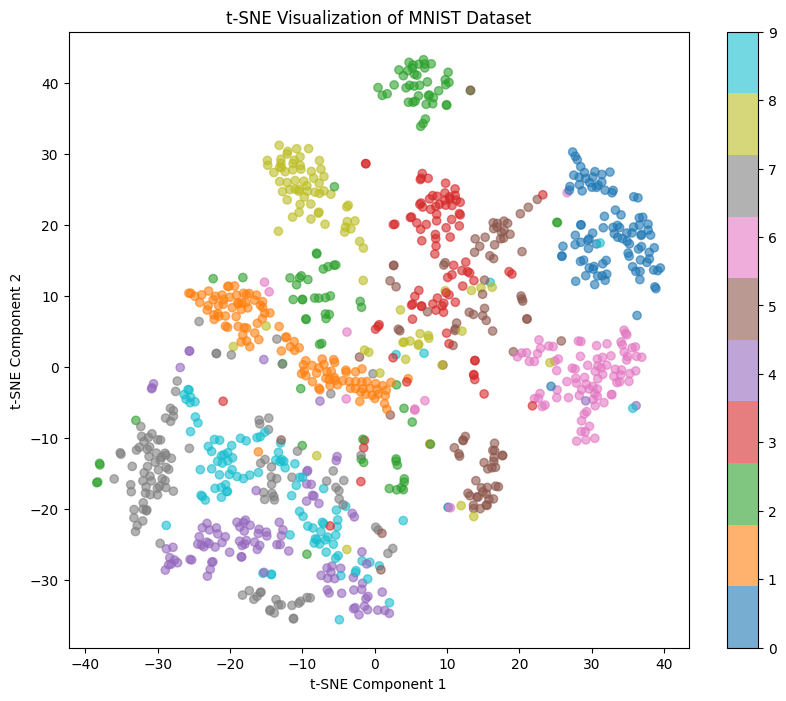

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Select a subset of samples
n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)  # Flatten the images
train_labels_subset = train_labels[:n_samples]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity as needed
train_images_tsne = tsne.fit_transform(train_images_flat)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
# Standardizing the values.
df = (df - df.min()) / (df.max() - df.min())
print(df)

        Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0          0.218182  0.059653  0.052563  0.000548  0.000227  0.000699   
1          0.454545  0.055973  0.065333  0.002030  0.000158  0.000564   
2          0.400000  0.027985  0.040632  0.001734  0.000206  0.001796   
3          0.345455  0.050214  0.066283  0.001254  0.000242  0.000550   
4          0.272727  0.034350  0.046492  0.000121  0.000221  0.001885   
...             ...       ...       ...       ...       ...       ...   
265622     0.563636  0.837178  0.710757  0.005280  0.000309  0.000034   
265623     0.636364  0.804718  0.725956  0.000433  0.000015  0.000670   
265624     0.563636  0.892804  0.716650  0.001979  0.000412  0.000435   
265625     0.527273  0.870703  0.718916  0.000869  0.000372  0.000127   
265626     0.563636  0.890948  0.706713  0.001058  0.001487  0.000696   

            CD22     CD11b       CD4       CD8  ...       CD3      CD61  \
0       0.001420  0.000509  0.001190  0.011009  

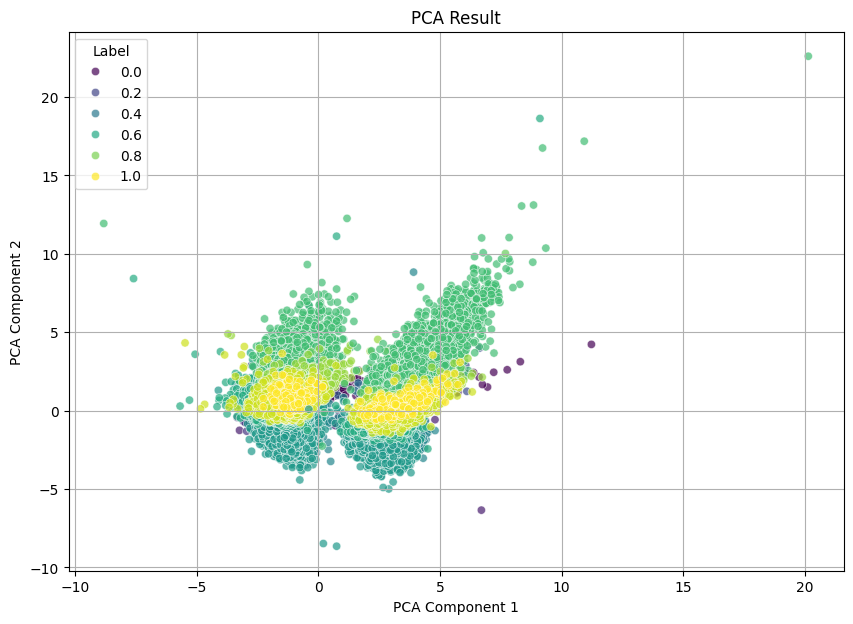

In [ ]:
#2-D plot of PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing: Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['label'], axis=1).dropna())  # Exclude the label column

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['label'] = df['label'].dropna().reset_index(drop=True)

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='viridis', alpha=0.7)
plt.title('PCA Result')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.grid()
plt.colorbar(scatter, label='Labels')
plt.show()

In [ ]:
#tabular representation of Standard deviation,Proportion of variance, Cumulative proportion
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Remove rows with NaN values
df_cleaned = df.dropna()

# Standardize the cleaned data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Perform PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)

# Extracting results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_deviation = np.sqrt(pca.explained_variance_)

# Creating the summary table
summary_table = pd.DataFrame({
    'Standard deviation': std_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(4)])

print(summary_table.T)


                             PC1       PC2       PC3       PC4
Standard deviation      2.091349  1.981198  1.728052  1.494168
Proportion of Variance  0.115097  0.103292  0.078583  0.058750
Cumulative Proportion   0.115097  0.218390  0.296972  0.355723


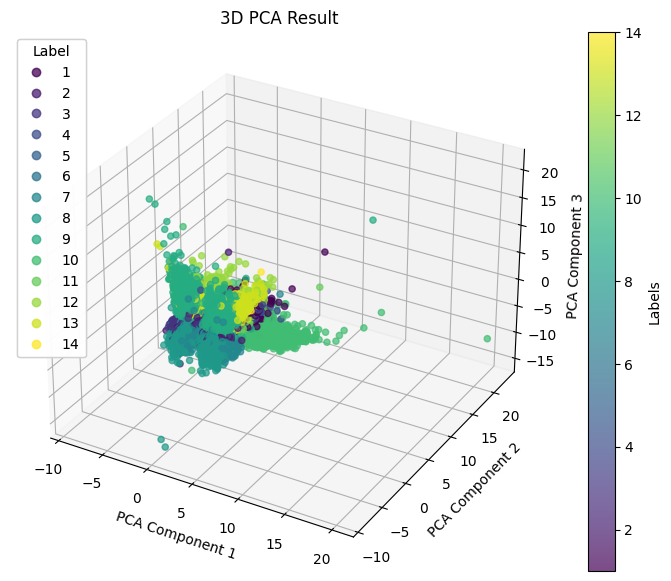

In [ ]:
#3-D plot of PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
# Preprocessing: Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['label'], axis=1).dropna())  # Exclude the label column

# Applying PCA for 3 components
pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['label'] = df['label'].dropna().reset_index(drop=True)

# 3D Plot PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on the label
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['label'], cmap='viridis', alpha=0.7)

# Add axis labels and a title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Result')

# Adding a color bar and a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Label")
ax.add_artist(legend1)
fig.colorbar(scatter, ax=ax, label='Labels')
plt.show()


In [ ]:
#removing selected columns to perform t-SNE
df_cleaned_after = df.drop(columns=[  'Cell_length', 'label', 'individual'])


len(df_cleaned_after.columns)

35

In [ ]:
# Separate features and labels
features = df_cleaned_after
labels = df['label']



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215000 samples in 0.006s...
[t-SNE] Computed neighbors for 215000 samples in 301.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 215000
[t-SNE] Computed conditional probabilities for sample 2000 / 215000
[t-SNE] Computed conditional probabilities for sample 3000 / 215000
[t-SNE] Computed conditional probabilities for sample 4000 / 215000
[t-SNE] Computed conditional probabilities for sample 5000 / 215000
[t-SNE] Computed conditional probabilities for sample 6000 / 215000
[t-SNE] Computed conditional probabilities for sample 7000 / 215000
[t-SNE] Computed conditional probabilities for sample 8000 / 215000
[t-SNE] Computed conditional probabilities for sample 9000 / 215000
[t-SNE] Computed conditional probabilities for sample 10000 / 215000
[t-SNE] Computed conditional probabilities for sample 11000 / 215000
[t-SNE] Computed conditional probabilities for sample 12000 / 215000
[t-SNE] Computed conditional proba

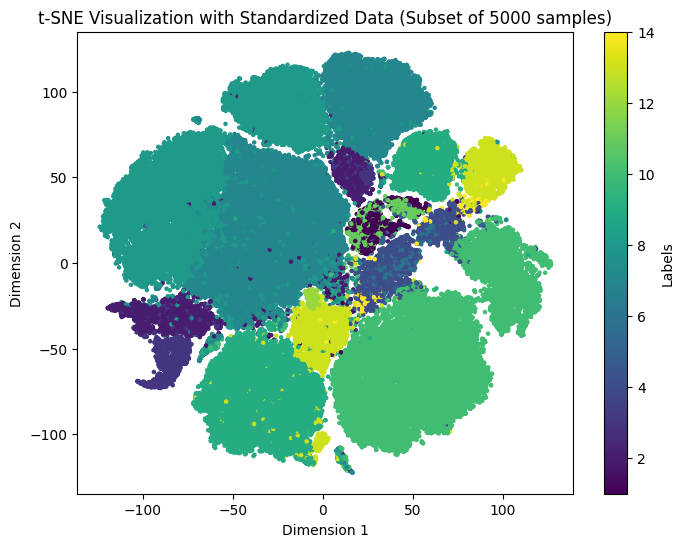

In [ ]:
#2-D plot of t-SNE
import numpy as np
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


n_samples = 215000
subset_indices = np.random.choice(len(features_standardized), n_samples, replace=False)


subset_features = features_standardized[subset_indices]
subset_labels = labels[subset_indices]


tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_result = tsne.fit_transform(subset_features)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=subset_labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization with Standardized Data ')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.colorbar(scatter, label='Labels')
plt.show()